<a href="https://colab.research.google.com/github/abir1234-art/TaskTechnoHacks_Task3_Diabetes-Prediction/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installation package kaggle

In [2]:
! pip install -q kaggle

In [3]:
! mkdir kaggle

In [6]:
!chmod 600 kaggle

In [7]:
! kaggle datasets list

401 - Unauthorized - Unauthenticated


In [11]:
import os

os.environ ['KAGGLE_USERNAME'] = 'abirbouarfa'
os.environ['KAGGLE_KEY'] = '49e4cae8b8a0beaacf3f19a021064c0a'

from kaggle.api.kaggle_api_extended import KaggleApi

dataset = 'uciml/pima-indians-diabetes-database/'
path = 'data'

api = KaggleApi()
api.authenticate()

api.dataset_download_files(dataset, path)

In [14]:
!sudo unzip data/pima-indians-diabetes-database.zip -d

Archive:  data/pima-indians-diabetes-database.zip
  inflating: dataset1/diabetes.csv   


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [17]:
df = pd.read_csv('dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


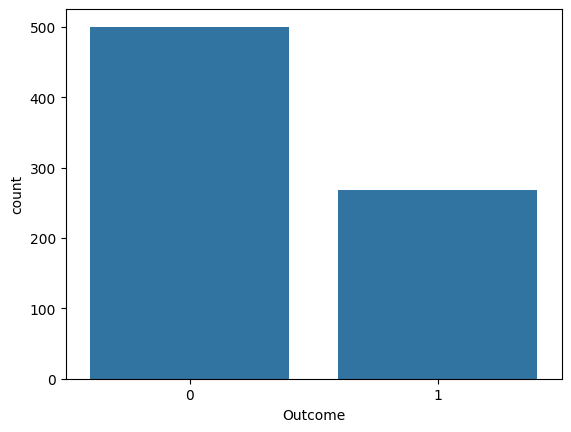

In [20]:
sns.countplot(data=df, x='Outcome')
plt.show()

In [21]:
positive_samples = df[df['Outcome'] == 1]
negative_samples = df[df['Outcome'] == 0]
num_sample = len(negative_samples) - len(positive_samples)

In [22]:
df = pd.concat([df, positive_samples.sample(num_sample, replace=True)], ignore_index=True)

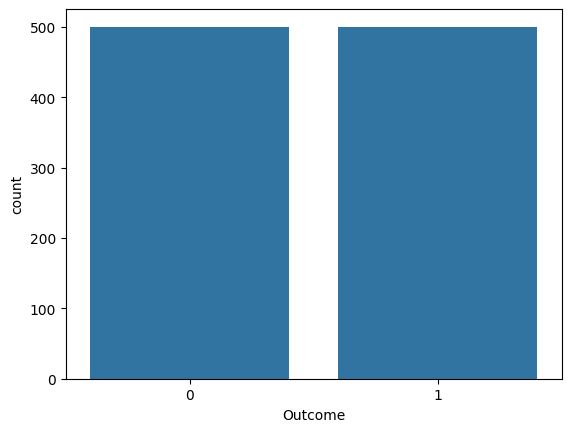

In [23]:
sns.countplot(data=df, x='Outcome')
plt.show()

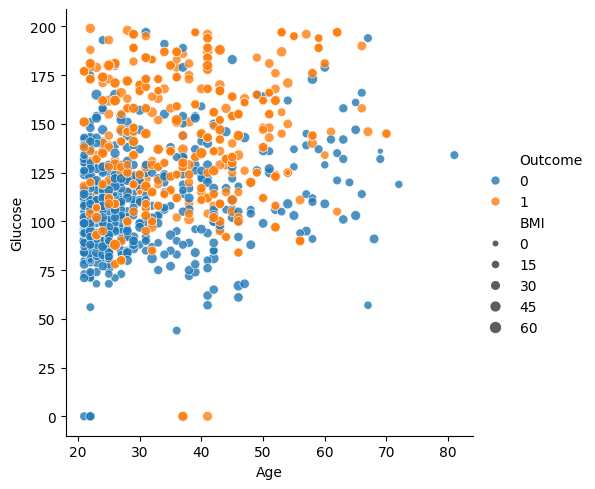

In [24]:
sns.relplot(data=df, x='Age', y='Glucose', hue='Outcome', size=df['BMI'], alpha=0.8)
plt.show()


In [25]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [26]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [28]:
x_train.shape, y_train.shape

((800, 8), (800,))

In [29]:
epochs = 50
batch_size = 32
loss = keras.losses.BinaryCrossentropy()
optimizer = 'adam'
metrics = ['accuracy', keras.metrics.Recall(), keras.metrics.Precision()]

In [30]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(8,)))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1281 (5.00 KB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/50
20/20 [==============================] - 1s 18ms/step - loss: 0.6551 - accuracy: 0.6172 - recall: 0.6352 - precision: 0.6103 - val_loss: 0.5996 - val_accuracy: 0.7250 - val_recall: 0.7654 - val_precision: 0.7126
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5840 - accuracy: 0.7469 - recall: 0.7673 - precision: 0.7349 - val_loss: 0.5514 - val_accuracy: 0.7437 - val_recall: 0.7531 - val_precision: 0.7439
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5478 - accuracy: 0.7500 - recall: 0.7516 - precision: 0.7469 - val_loss: 0.5244 - val_accuracy: 0.7250 - val_recall: 0.7160 - val_precision: 0.7342
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5261 - accuracy: 0.7563 - recall: 0.7516 - precision: 0.7563 - val_loss: 0.5087 - val_accuracy: 0.7250 - val_recall: 0.7284 - val_precision: 0.7284
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5126 - accuracy: 0.7563 - recall: 0.7

In [33]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 1s 10ms/step - loss: 0.5326 - accuracy: 0.7550 - recall: 0.7822 - precision: 0.7453


[0.5325806736946106,
 0.7549999952316284,
 0.7821782231330872,
 0.7452830076217651]

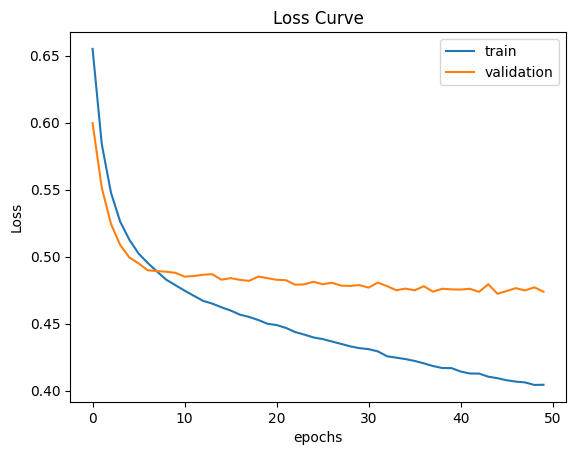

In [34]:
plt.plot(range(epochs), history.history['loss'], label='train')
plt.plot(range(epochs), history.history['val_loss'], label='validation')
plt.title('Loss Curve')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

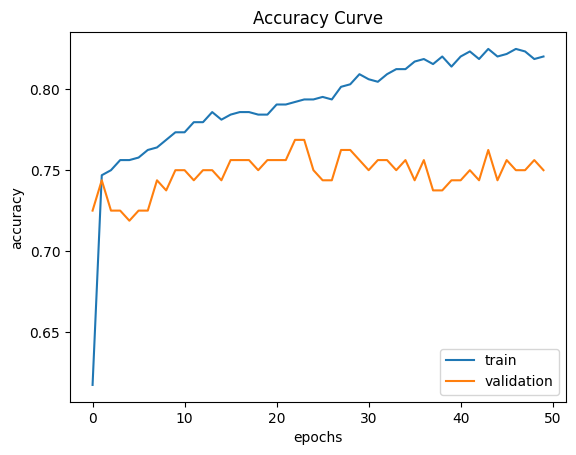

In [35]:
plt.plot(range(epochs), history.history['accuracy'], label='train')
plt.plot(range(epochs), history.history['val_accuracy'], label='validation')
plt.title('Accuracy Curve')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()